In [1]:
import numpy as np
from openpyxl import load_workbook
wb = load_workbook('./Classification results.xlsx')
classification = wb.worksheets[0]
sheetsMatrix = np.array(list(classification.values))
classMatrix = sheetsMatrix[:, 1:]

In [2]:
wb = load_workbook("../1.xlsx")
sheets = wb.worksheets
sheet_point_list = sheets[0]
sheet_distance = sheets[1]
pointListAll = np.array(list(sheet_point_list.values)[1:])

pointMap = {}
for row in np.around(np.array(pointListAll[:, [0, 1, 2]], float), 2):
    pointMap[int(row[0])] = row

bluePointList = pointListAll[pointListAll[:, 3] == "red"]
bluePointList = bluePointList[:, [0, 1, 2]]
bluePointList = np.around(np.array(bluePointList, float), 2)

redPointList = pointListAll[pointListAll[:, 3] == "blue"]
redPointList = redPointList[:, [0, 1, 2]]
redPointList = np.around(np.array(redPointList, float), 2)

In [3]:
classMatrix.T
pointListAll

array([['1', '74.6492750000023', '25.1005333333344', 'red', '0.19'],
       ['2', '86.2242500000008', '16.6076666666678', 'red', '0.22'],
       ['3', '86.0222750000013', '16.3790999999994', 'red', '0.18'],
       ...,
       ['434', '78.8388750000024', '0.800533333332965', 'blue', '0.13'],
       ['435', '75.044400000003', '11.4740666666672', 'blue', '0.05'],
       ['436', '74.4767500000023', '11.6387666666663', 'blue', '0.23']],
      dtype='<U32')

In [4]:
import matplotlib.pyplot as plt
# 全地图鸟瞰

plt.close()

fig, ax = plt.subplots(dpi=1000, figsize=(15, 8))
# plt.figure(dpi=1000, figsize=(15, 8))
plt.title(f"Classification Map", fontsize=24)
plt.axis([70, 100, 0, 30])
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=14)
ax.scatter(redPointList[:, 1], redPointList[:, 2], color="r", s=0.1)
ax.scatter(bluePointList[:, 1], bluePointList[:, 2], color="b", s=0.1)
for row in redPointList:
    ax.text(row[1], row[2], int(row[0]), fontsize=1)
for row in bluePointList:
    ax.text(row[1], row[2], int(row[0]), fontsize=1)

# plt.plot(pointList[:, 1], pointList[:, 2], color="b",linewidth=0.1)
for row in list(sheet_distance.values)[1:]:
    fromId = int(row[1])
    toId = int(row[2])
    x = [pointMap[fromId][1], pointMap[toId][1]]
    y = [pointMap[fromId][2], pointMap[toId][2]]
    ax.plot(x, y, color="g", linewidth=0.1)

    
import alphashape
from descartes import PolygonPatch

count = 1
for item in classMatrix.T:
    item = item[item != 0]
    indexClassification = item[0]
    pointIdList = np.array(item[1:], int)
    pointList = np.around(np.array(pointListAll[pointIdList - 1][:, 1:3], float), 2)
    # print(pointList)
    alpha_shape = alphashape.alphashape(pointList)
    # ax.scatter(*zip(*pointList))
    ax.add_patch(PolygonPatch(alpha_shape.buffer(.3), alpha=0.3))
    # plt.scatter(pointList[:, 0], pointList[:, 1])
    print(count)
    count += 1

plt.savefig("./Classification Map.png")
plt.show()

D:\ProgramData\Miniconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
D:\ProgramData\Miniconda3\lib\site-packages\shapely\ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)


1


D:\ProgramData\Miniconda3\lib\site-packages\alphashape\optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


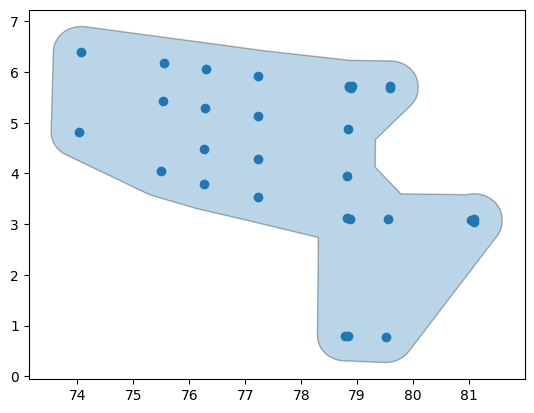

In [5]:
# 散点图轮廓Demo
import alphashape
from descartes import PolygonPatch

plt.close()
for item in classMatrix.T[1:]:
    item = item[item != 0]
    indexClassification = item[0]
    pointIdList = np.array(item[1:], int)
    pointList = np.around(np.array(pointListAll[pointIdList - 1][:, 1:3], float), 2)
    
    alpha_shape = alphashape.alphashape(pointList)
    fig, ax = plt.subplots()
    ax.scatter(*zip(*pointList))
    ax.add_patch(PolygonPatch(alpha_shape.buffer(.5), alpha=0.3))
    # plt.scatter(pointList[:, 0], pointList[:, 1])
    break
plt.show()